<a href="https://colab.research.google.com/github/shristi100805/weather-prediction-and-analysis/blob/main/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
import numpy as np


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
print("--- Loading dataset from 'delhi.csv'... ---")
try:
    data = pd.read_csv('delhi.csv', parse_dates=['date_time'], index_col='date_time')
    print("Columns in the CSV file:")
    print(data.columns)
except FileNotFoundError:
    print("Error: 'delhi.csv' not found. Please check the file name and path.")

    dates = pd.to_datetime(pd.date_range(start='2010-01-01', periods=365*5, freq='D'))
    temperatures = 25 + 5 * np.sin(2 * np.pi * np.arange(len(dates)) / 365) + np.random.normal(0, 1, len(dates))
    data = pd.DataFrame({'tempC': temperatures}, index=dates)
print("\nDataset loaded successfully.")

--- Loading dataset from 'delhi.csv'... ---
Columns in the CSV file:
Index(['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')

Dataset loaded successfully.


In [ ]:
print("Initial data shape:", data.shape)

Initial data shape: (96432, 24)


In [ ]:
print("First 5 rows:")
print(data.head())

First 5 rows:
                     maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  \
date_time                                                                 
2009-01-01 00:00:00        22         9           0.0      8.7        4   
2009-01-01 01:00:00        22         9           0.0      8.7        4   
2009-01-01 02:00:00        22         9           0.0      8.7        4   
2009-01-01 03:00:00        22         9           0.0      8.7        4   
2009-01-01 04:00:00        22         9           0.0      8.7        4   

                     uvIndex.1  moon_illumination  moonrise   moonset  \
date_time                                                               
2009-01-01 00:00:00          1                 31  10:11 AM  09:57 PM   
2009-01-01 01:00:00          1                 31  10:11 AM  09:57 PM   
2009-01-01 02:00:00          1                 31  10:11 AM  09:57 PM   
2009-01-01 03:00:00          1                 31  10:11 AM  09:57 PM   
2009-01-01 04:00:00   

In [ ]:
print("\nData information:")
print(data.info())


Data information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96432 entries, 2009-01-01 00:00:00 to 2020-01-01 23:00:00
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   maxtempC           96432 non-null  int64  
 1   mintempC           96432 non-null  int64  
 2   totalSnow_cm       96432 non-null  float64
 3   sunHour            96432 non-null  float64
 4   uvIndex            96432 non-null  int64  
 5   uvIndex.1          96432 non-null  int64  
 6   moon_illumination  96432 non-null  int64  
 7   moonrise           96432 non-null  object 
 8   moonset            96432 non-null  object 
 9   sunrise            96432 non-null  object 
 10  sunset             96432 non-null  object 
 11  DewPointC          96432 non-null  int64  
 12  FeelsLikeC         96432 non-null  int64  
 13  HeatIndexC         96432 non-null  int64  
 14  WindChillC         96432 non-null  int64  
 15  WindGustKmph    

In [ ]:
data.rename(columns={'tempC': 'Temperature'}, inplace=True)

In [ ]:
data.dropna(inplace=True)

In [ ]:
print("\n--- Data after Preprocessing and Target Column Selection ---")
print("First 5 rows with 'Temperature' column:")
print(data.head())


--- Data after Preprocessing and Target Column Selection ---
First 5 rows with 'Temperature' column:
                     maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  \
date_time                                                                 
2009-01-01 00:00:00        22         9           0.0      8.7        4   
2009-01-01 01:00:00        22         9           0.0      8.7        4   
2009-01-01 02:00:00        22         9           0.0      8.7        4   
2009-01-01 03:00:00        22         9           0.0      8.7        4   
2009-01-01 04:00:00        22         9           0.0      8.7        4   

                     uvIndex.1  moon_illumination  moonrise   moonset  \
date_time                                                               
2009-01-01 00:00:00          1                 31  10:11 AM  09:57 PM   
2009-01-01 01:00:00          1                 31  10:11 AM  09:57 PM   
2009-01-01 02:00:00          1                 31  10:11 AM  09:57 PM   
2009-01

In [ ]:
print("\n--- Creating new features from the date index ---")
data['year'] = data.index.year
data['month'] = data.index.month
data['day_of_week'] = data.index.dayofweek
data['day_of_year'] = data.index.dayofyear


--- Creating new features from the date index ---


In [ ]:
data['temp_lag_1'] = data['Temperature'].shift(1)
data.fillna(method='bfill', inplace=True)

print("Data with new features:")
print(data.head())

Data with new features:
                     maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  \
date_time                                                                 
2009-01-01 00:00:00        22         9           0.0      8.7        4   
2009-01-01 01:00:00        22         9           0.0      8.7        4   
2009-01-01 02:00:00        22         9           0.0      8.7        4   
2009-01-01 03:00:00        22         9           0.0      8.7        4   
2009-01-01 04:00:00        22         9           0.0      8.7        4   

                     uvIndex.1  moon_illumination  moonrise   moonset  \
date_time                                                               
2009-01-01 00:00:00          1                 31  10:11 AM  09:57 PM   
2009-01-01 01:00:00          1                 31  10:11 AM  09:57 PM   
2009-01-01 02:00:00          1                 31  10:11 AM  09:57 PM   
2009-01-01 03:00:00          1                 31  10:11 AM  09:57 PM   
2009-01-01 0

/tmp/ipython-input-3958695093.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


In [ ]:
features = ['year', 'month', 'day_of_week', 'day_of_year', 'temp_lag_1']
target = 'Temperature'

X = data[features]
y = data[target]

# We will split the data chronologically
test_size = int(len(data) * 0.2)
X_train = X[:-test_size]
X_test = X[-test_size:]
y_train = y[:-test_size]
y_test = y[-test_size:]

print("\n--- Data split into training and testing sets ---")
print("Training set shape (X_train):", X_train.shape)
print("Testing set shape (X_test):", X_test.shape)
print("Training labels shape (y_train):", y_train.shape)
print("Testing labels shape (y_test):", y_test.shape)


--- Data split into training and testing sets ---
Training set shape (X_train): (77146, 5)
Testing set shape (X_test): (19286, 5)
Training labels shape (y_train): (77146,)
Testing labels shape (y_test): (19286,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
print("\n--- Training the Random Forest Regressor model ---")
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)


--- Training the Random Forest Regressor model ---


In [ ]:
model.fit(X_train, y_train)

print("\nModel training complete.")


Model training complete.


In [ ]:
print("--- Making predictions on the test set ---")
y_pred = model.predict(X_test)

--- Making predictions on the test set ---


In [ ]:
print("\n--- Evaluating model performance ---")
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}°C")
print(f"R-squared (R2) score: {r2:.2f}")


--- Evaluating model performance ---
Mean Absolute Error (MAE): 0.84°C
R-squared (R2) score: 0.98



--- Plotting predictions vs. actual data ---


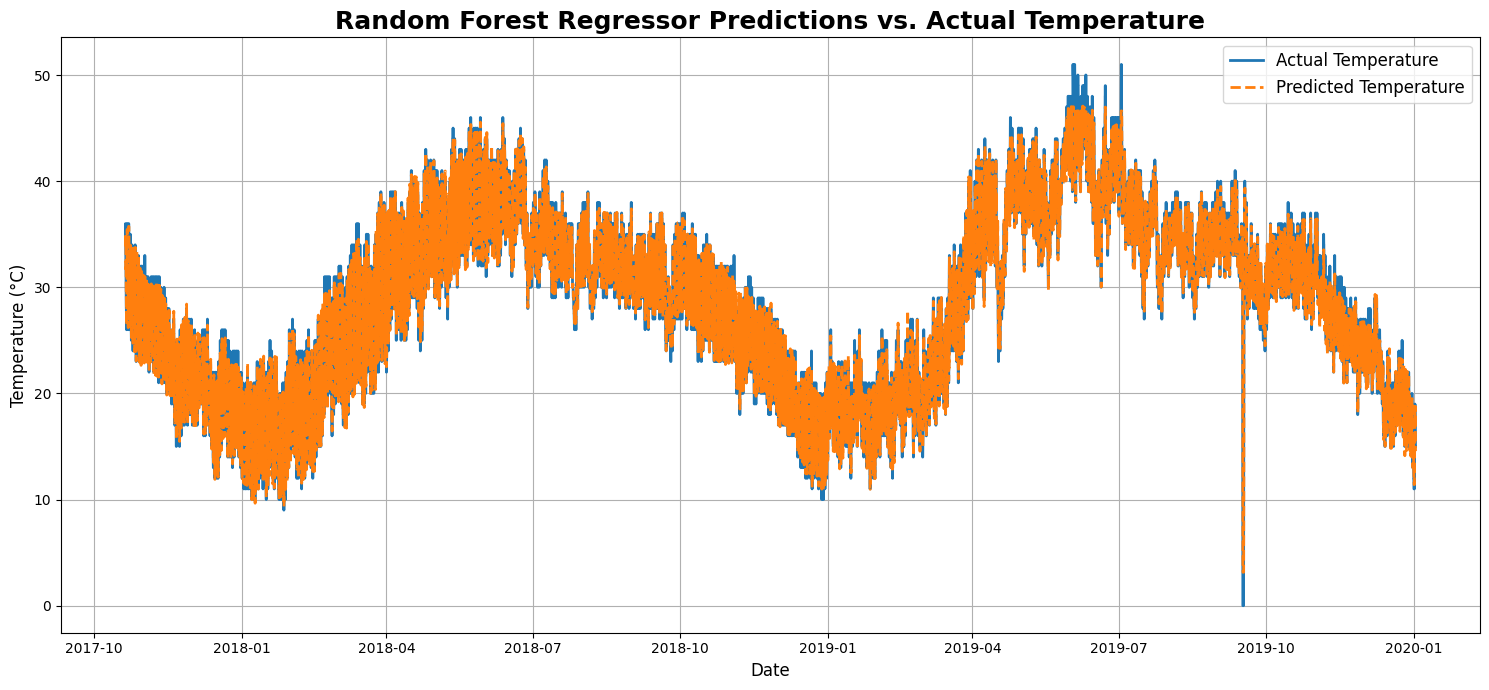


Project complete! You have successfully trained and evaluated a machine learning model for weather prediction.


In [ ]:
import matplotlib.pyplot as plt

print("\n--- Plotting predictions vs. actual data ---")
plt.figure(figsize=(15, 7))
plt.plot(y_test.index, y_test, label='Actual Temperature', color='#1f77b4', linewidth=2)
plt.plot(y_test.index, y_pred, label='Predicted Temperature', color='#ff7f0e', linestyle='--', linewidth=2)
plt.title('Random Forest Regressor Predictions vs. Actual Temperature', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nProject complete! You have successfully trained and evaluated a machine learning model for weather prediction.")

In [ ]:
import joblib

print("\n--- Saving the trained model to a file ('random_forest_model.joblib') ---")
joblib.dump(model, 'random_forest_model.joblib')
print("Model saved successfully.")


--- Saving the trained model to a file ('random_forest_model.joblib') ---
Model saved successfully.


In [ ]:
from datetime import timedelta
import joblib

print("\n--- Loading the saved model and making a new prediction ---")

# Load the saved model
loaded_model = joblib.load('random_forest_model.joblib')



--- Loading the saved model and making a new prediction ---


In [ ]:
# Get the last date from our dataset to set a starting point for our prediction
last_date_in_data = data.index.max()
print(f"Last date in the training data: {last_date_in_data.date()}")

# Define the date you want to predict. For this example, we will predict one year from the last date.
prediction_date = last_date_in_data + timedelta(days=365)
print(f"Prediction date: {prediction_date.date()}")

# To make a prediction, we need to create a new row of data with the same features.
# We'll use the last known temperature from the dataset as the 'temp_lag_1' value.
last_known_temp = data['Temperature'].iloc[-1]
print(f"Last known temperature: {last_known_temp:.2f}°C")
future_data = pd.DataFrame({
    'year': [prediction_date.year],
    'month': [prediction_date.month],
    'day_of_week': [prediction_date.dayofweek],
    'day_of_year': [prediction_date.dayofyear],
    'temp_lag_1': [last_known_temp]  # Use the last known temperature
})

# Use the loaded model to make the prediction
predicted_temp = loaded_model.predict(future_data)

print(f"\nPredicted temperature for {prediction_date.date()}: {predicted_temp[0]:.2f}°C")


Last date in the training data: 2020-01-01
Prediction date: 2020-12-31
Last known temperature: 15.00°C

Predicted temperature for 2020-12-31: 15.55°C


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import joblib

# --- Step 1: Load the data and the trained model ---
# We need the original data to get the last known temperature, which is a feature for our model.
try:
    data = pd.read_csv('delhi.csv', parse_dates=['date_time'], index_col='date_time')
    # Use the same renaming as before
    data.rename(columns={'tempC': 'Temperature'}, inplace=True)
    data.dropna(inplace=True)
    last_known_temp = data['Temperature'].iloc[-1]
    last_known_date = data.index.max().date()
    print(f"Data loaded successfully. Last known temperature is {last_known_temp:.2f}°C on {last_known_date}.")
except FileNotFoundError:
    print("Error: 'delhi.csv' not found. Please ensure the file is in the same directory.")
    last_known_temp = 25.0
    last_known_date = datetime.now().date()
    print("Using placeholder data for demonstration.")

# Load the pre-trained Random Forest model
try:
    model = joblib.load('random_forest_model.joblib')
    print("Model loaded successfully.")
except FileNotFoundError:
    print("Error: 'random_forest_model.joblib' not found. Please run the model training script first.")
    exit()

# --- Step 2: Create an interactive loop for user input ---
print("\n--- Welcome to the Weather Prediction Tool! ---")
print("Enter a date in YYYY-MM-DD format to predict the temperature.")
print("Type 'exit' to quit.")

while True:
    user_input = input("\nEnter a date: ")

    if user_input.lower() == 'exit':
        print("Goodbye!")
        break

    try:
        # Convert user input string to a datetime object
        prediction_date = datetime.strptime(user_input, '%Y-%m-%d')
        print(f"Predicting temperature for {prediction_date.date()}...")

        # Create a new DataFrame for the single prediction date
        # The model requires the same features it was trained on.
        future_data = pd.DataFrame({
            'year': [prediction_date.year],
            'month': [prediction_date.month],
            'day_of_week': [prediction_date.weekday()],  # Corrected line
            'day_of_year': [prediction_date.timetuple().tm_yday],
            # For 'temp_lag_1', we use the last known temperature from our historical data
            # since we don't have the temperature for the day before the prediction date.
            'temp_lag_1': [last_known_temp]
        })

        # Make the prediction using the loaded model
        predicted_temp = model.predict(future_data)

        # Print the result to the user
        print(f"Predicted temperature for {prediction_date.date()}: {predicted_temp[0]:.2f}°C")

    except ValueError:
        print("Invalid date format. Please use YYYY-MM-DD.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")


Data loaded successfully. Last known temperature is 15.00°C on 2020-01-01.
Model loaded successfully.

--- Welcome to the Weather Prediction Tool! ---
Enter a date in YYYY-MM-DD format to predict the temperature.
Type 'exit' to quit.

Enter a date: 2026-05-15
Predicting temperature for 2026-05-15...
Predicted temperature for 2026-05-15: 16.47°C

Enter a date: 2025-08-08
Predicting temperature for 2025-08-08...
Predicted temperature for 2025-08-08: 16.41°C

Enter a date: exit
Goodbye!
